<a href="https://colab.research.google.com/github/juccaicedoac03/Data_Science_Course/blob/main/2_Supervised_learning/2_Regression_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real problem

**Objective:** To predict house prices acoording to the houses information from the 1990 California census.

**Data:** Kaggle dataset ([California Housing Prices](https://www.kaggle.com/camnugent/california-housing-prices)).

*Reference: Hands-On Machine Learning with Scikit-Learn and Tensor Flow 2017 (Cap 2) -- Aurélien Géron*


# Main steps for ML projects

1. Analyze the problem.
2. Get the data.
3. **EDA:** Exploratory Data Analysis (Data visualization and descriptive statistics)
4. Prepare data for machine learning algorithms (Data cleaning, Preprocessing and Feature extraction)
5. Select and train the ML model.
6. Hyperparameter/parameter tuning.
7. Show performance results.
8. Deploy the solution (Usually on cloud)
9. Maintaining the model.

# ML project

## Obtaining Kaggle dataset

1. Go to: Kaggle (Login) --> Account --> Create New API Token, and download "kaggle.json" file.

2. Save the Token file on Drive and get the public link (Share the file).

3. Load Token file on Colab.



In [1]:
!gdown  # Change link according to your token ID

Downloading...
From: https://drive.google.com/uc?id=1rCXJPBPJx_rwtM7sqS8_PthETz7Y6Mqj
To: /content/kaggle.json
100% 67.0/67.0 [00:00<00:00, 112kB/s]


4. Create kaggle folder for the Token file

In [2]:
!mkdir -p ~/.kaggle/ && cp  /content/kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

5. Download dataset using kaggle API

<img src="https://github.com/juccaicedoac03/Data_Science_Course/blob/main/2_Supervised_learning/Figs/kaggle_down.png?raw=true:, width=100" alt="find roots" width=800>

In [5]:
!kaggle datasets download -d camnugent/california-housing-prices

  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 80.4MB/s]


In [6]:
!unzip \*.zip  && rm *.zip

Archive:  california-housing-prices.zip
  inflating: housing.csv             


## Import libraries

In [31]:
import numpy as np 

%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd

## Read data

In [9]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## EDA (Basic)

In [10]:
housing.info() # check amount of data, data types, empty fields

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
housing["ocean_proximity"].value_counts() #counting feature values

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
housing.describe() # basic statistics

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Q:** What's the difference between mean and median? 

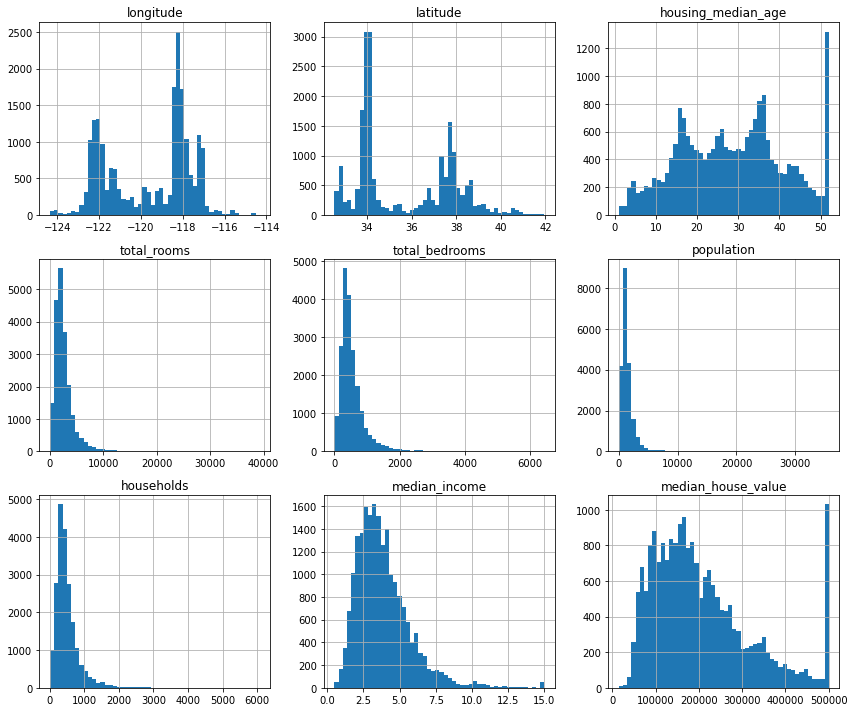

In [22]:
housing.hist(bins=50, figsize=(12,10))
plt.tight_layout()
plt.show()

**Q:** EDA conclusion? 

**Q:** What about the histograms?

**Q:** What can you infer about the variable of interest from the histogram?


**Q:** Asimetric values? (see [quartiles](https://en.wikipedia.org/wiki/Interquartile_range))

## Prepare the data

In order to avoid **overfitting**, we use Train/Test partition

<img src="https://github.com/juccaicedoac03/Data_Science_Course/blob/main/2_Supervised_learning/Figs/crossvalidation.png?raw=true:, width=100" alt="find roots" width=800>

In [32]:
from sklearn.model_selection import train_test_split

In [24]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)#20% for Test partition

In [25]:
print(train_set.shape,test_set.shape)

(16512, 10) (4128, 10)


In [26]:
test_set.head() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


To avoid problems about imbalance partitions, it is recommended to use stratified sampling when there are asymmetric distributions in the distributions of the variables (imbalance).

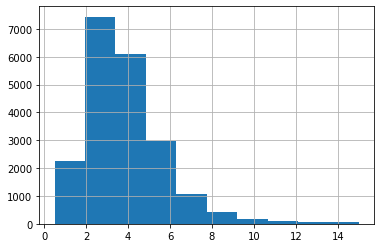

In [27]:
housing["median_income"].hist()
plt.show()

*Process:* change median_income feature from continous to categorical

In [28]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5]) # Thresholding

In [29]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

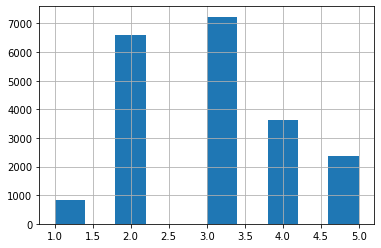

In [30]:
housing["income_cat"].hist()
plt.show()

**NOTE:** In order to split data taking account variable inbalance we use stratified split method

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit

In [34]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"].values): #variable to stratiffied: income_cat 
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [35]:
test_index # row index from stratification process

array([ 5241, 17352,  3505, ..., 17223, 10786,  3965])

In [36]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)# counting stratified train data

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [37]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)# counting stratified test data

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

Error comparison between stratified data and original data

In [39]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({ # Creating dict to show results
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [40]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


Droping rows and columns of income_cat

In [41]:
for set_ in (strat_train_set, strat_test_set): 
    set_.drop("income_cat", axis=1, inplace=True)

## Sampling data visualization 

In [42]:
housing = strat_train_set.copy() # make data copy
housing.shape

(16512, 10)

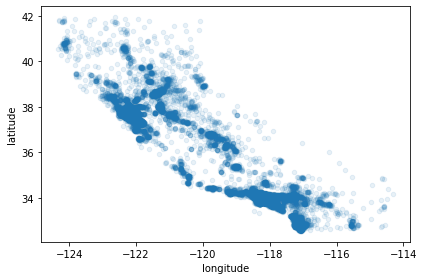

In [44]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.1) # georeferenced visualization
plt.tight_layout()
plt.show()

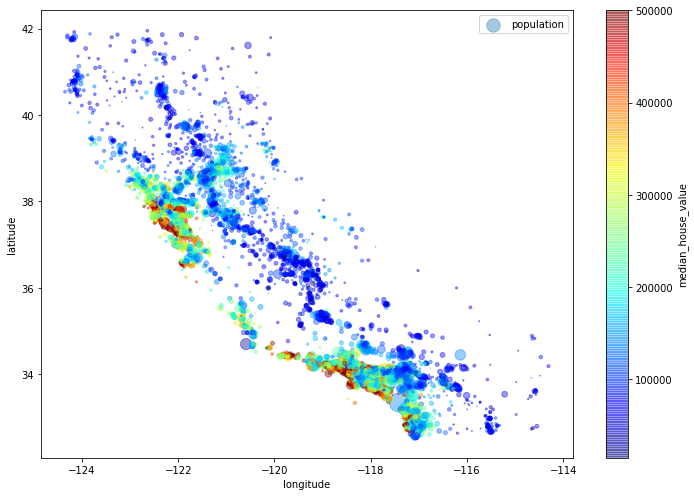

In [45]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.tight_layout()
plt.show()

In [47]:
import matplotlib.image as mpimg # For maps

In [48]:
!gdown 1mjjLVFkpave6F7S7ngoE8IScJaMujutM

Downloading...
From: https://drive.google.com/uc?id=1mjjLVFkpave6F7S7ngoE8IScJaMujutM
To: /content/california.png
100% 10.0k/10.0k [00:00<00:00, 13.7MB/s]


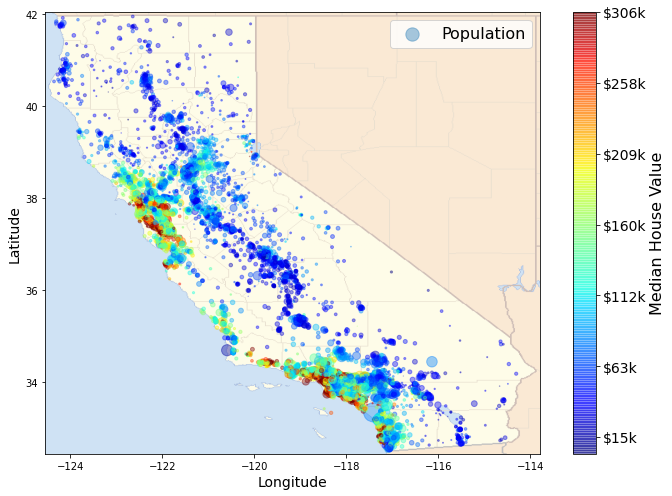

In [49]:
california_img=mpimg.imread('/content/california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.tight_layout()
plt.show()

**Q:** Conclution about data visualization?